# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [14]:
# Importing the file porter_data_1.csv
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [23]:
df = pd.read_csv('porter_data_1.csv')
df.head()


market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [16]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df = pd.read_csv('porter_data_1.csv', on_bad_lines='skip')
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')

df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [19]:
# Convert categorical features to category type
categorical_columns = ['market_id', 'store_primary_category', 'order_protocol']

for col in categorical_columns:
    df[col] = df[col].astype('category')

df[categorical_columns].dtypes


market_id                 category
store_primary_category    category
order_protocol            category
dtype: object

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [24]:
# Calculate time taken in minutes
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')
df['time_taken_min'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

df['time_taken_min'].head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: time_taken_min, dtype: float64

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [27]:
# Extract the hour and day of week from the 'created_at' timestamp

df['order_hour'] = df['created_at'].dt.hour
df['order_day'] = df['created_at'].dt.day_name()
# Create a categorical feature 'isWeekend'

df['isWeekend'] = df['order_day'].isin(['Saturday', 'Sunday']).astype('category')

df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken_min  order_hour order_day  \
0                      21.0     34.44            47.0          22    Friday   
1                       2.0     27.60            44.0          21   Tuesday   
2                      18.0     11.56            55.0           0    Monday   
3                       8.0     31.80            59.0           3  Thursday   
4                       7.0      8.20            46.0           2   Tuesday   

  isWeekend  
0     False  
1     False  
2     False  
3     False  
4     False

In [32]:
# Drop unnecessary columns
columns_to_drop = ['created_at', 'actual_delivery_time']
df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
df.head()

market_id  store_primary_category  order_protocol  total_items  subtotal  \
0        1.0                       4             1.0            4      3441   
1        2.0                      46             2.0            1      1900   
2        2.0                      36             3.0            4      4771   
3        1.0                      38             1.0            1      1525   
4        1.0                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken_min  \
0                14.0                      21.0     34.44            47.0   
1                 2.0                       2.0     27.60            44.0   
2                 6.0                      18.0     11.56            55.0   
3                 6.0                       8.0     31.80            59.0   
4                 5.0                       7.0      8.20            46.0   

   order_hour order_day isWeekend  
0          22    Friday     False  
1          21   Tuesday     False  
2           0    Monday     False  
3           3  Thursday     False  
4           2   Tuesday     False

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [33]:
# Define target variable (y) and features (X)

y = df['time_taken_min']
X = df.drop(columns=['time_taken_min'])

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [34]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [41]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns: ['isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

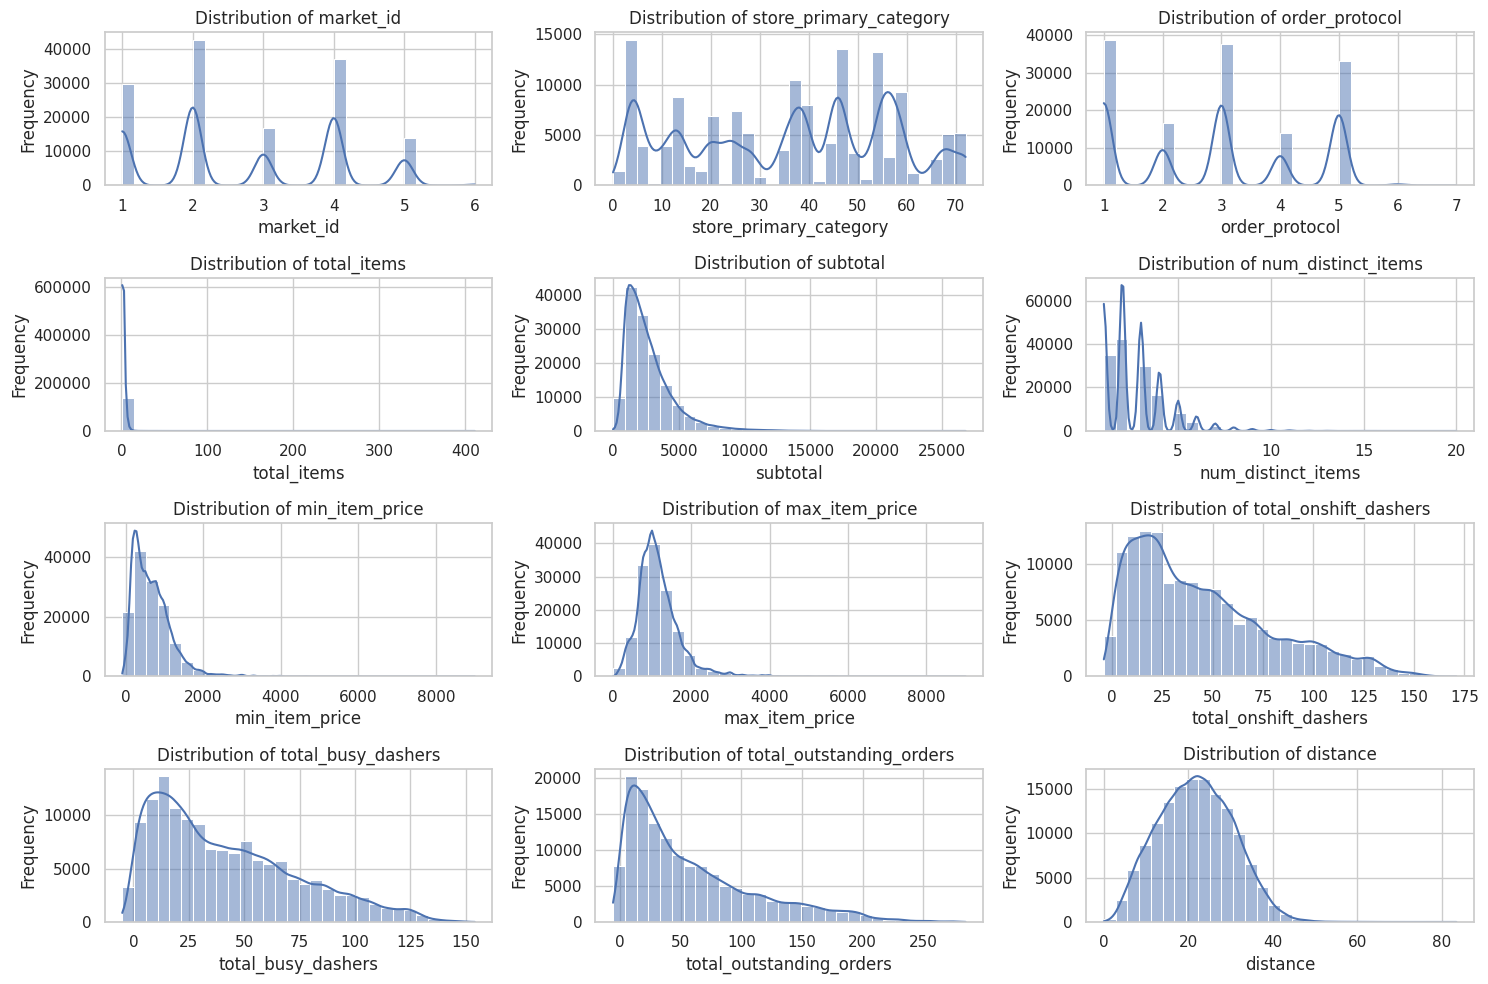

In [42]:
# Plot distributions for all numerical columns

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Plot distributions for all numerical columns
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i + 1)
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

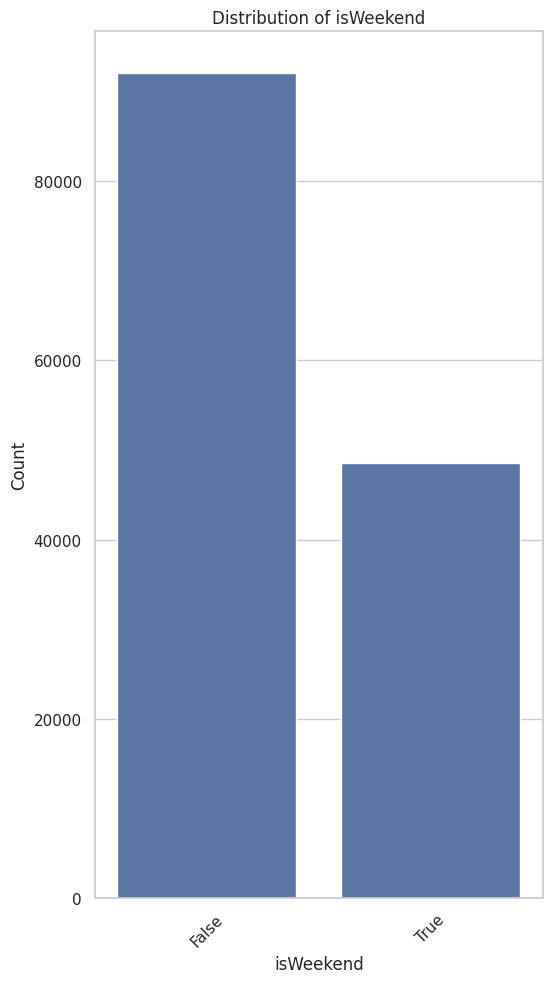

In [43]:
# Distribution of categorical columns

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Plot bar chart for each categorical column
for i, col in enumerate(categorical_cols):
    plt.subplot((len(categorical_cols) + 2) // 3, 3, i + 1)
    sns.countplot(data=X_train, x=col, order=X_train[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

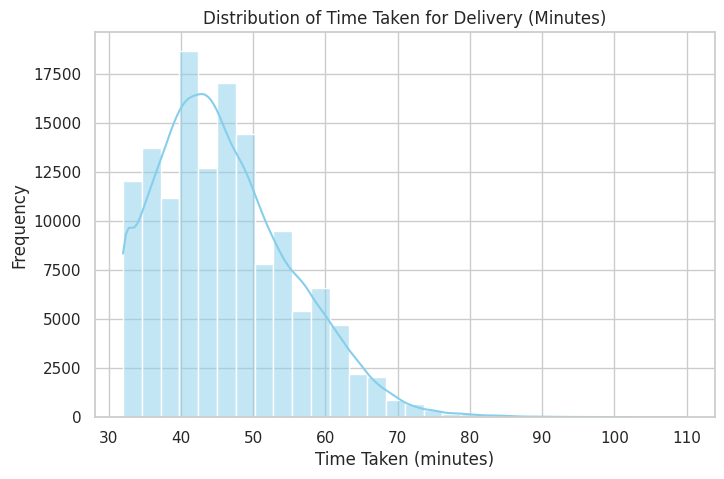

In [44]:
# Distribution of time_taken

import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(y_train, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Time Taken for Delivery (Minutes)')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

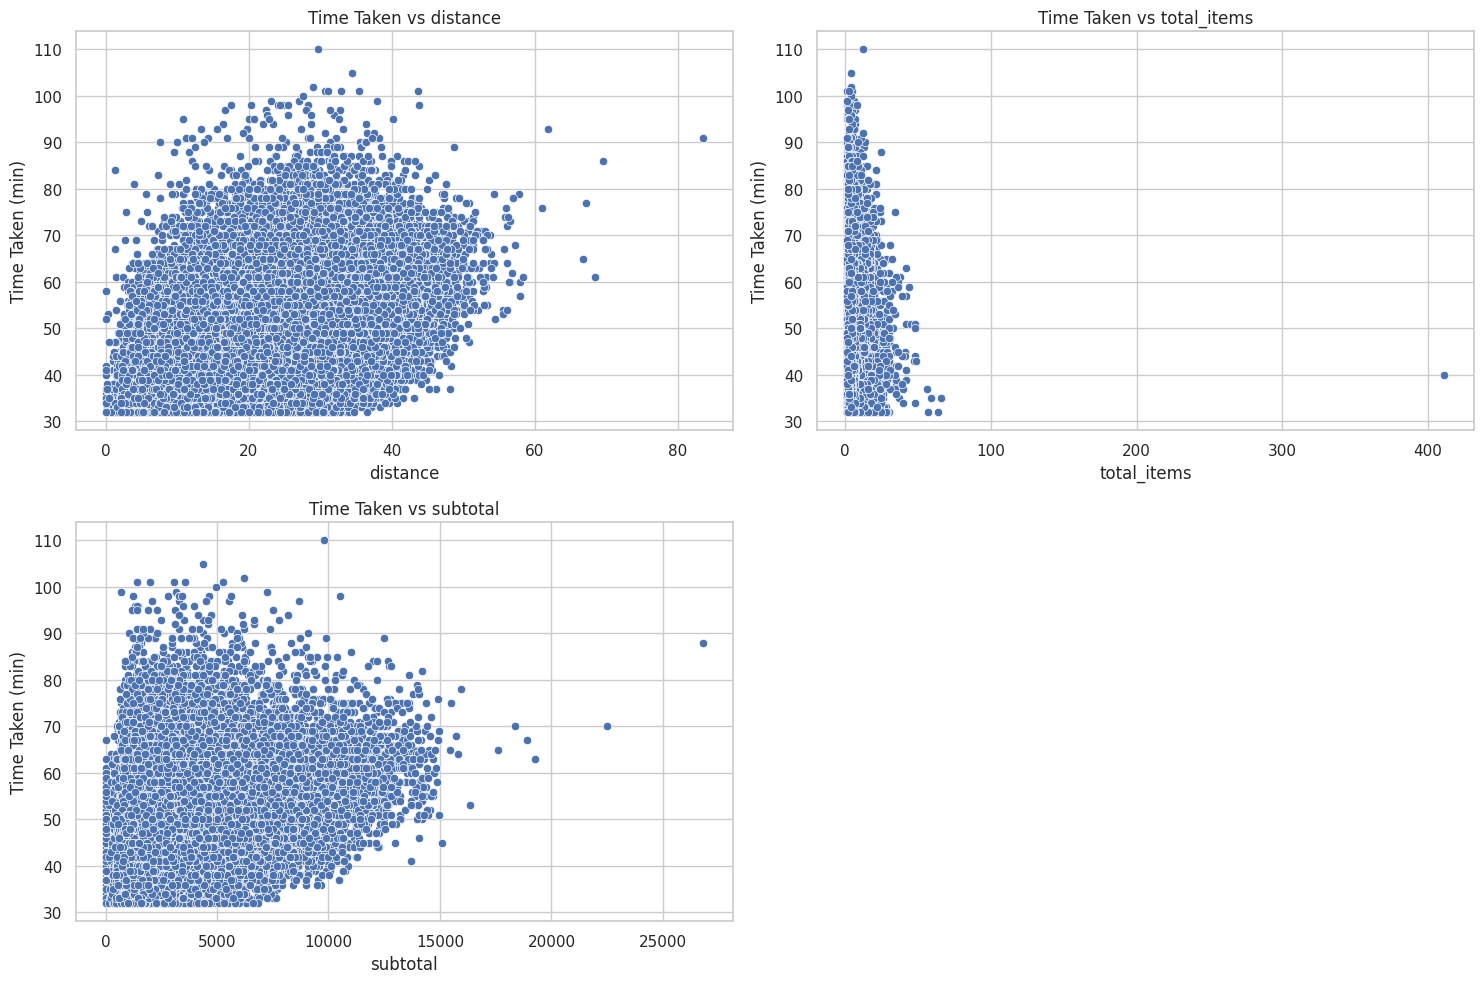

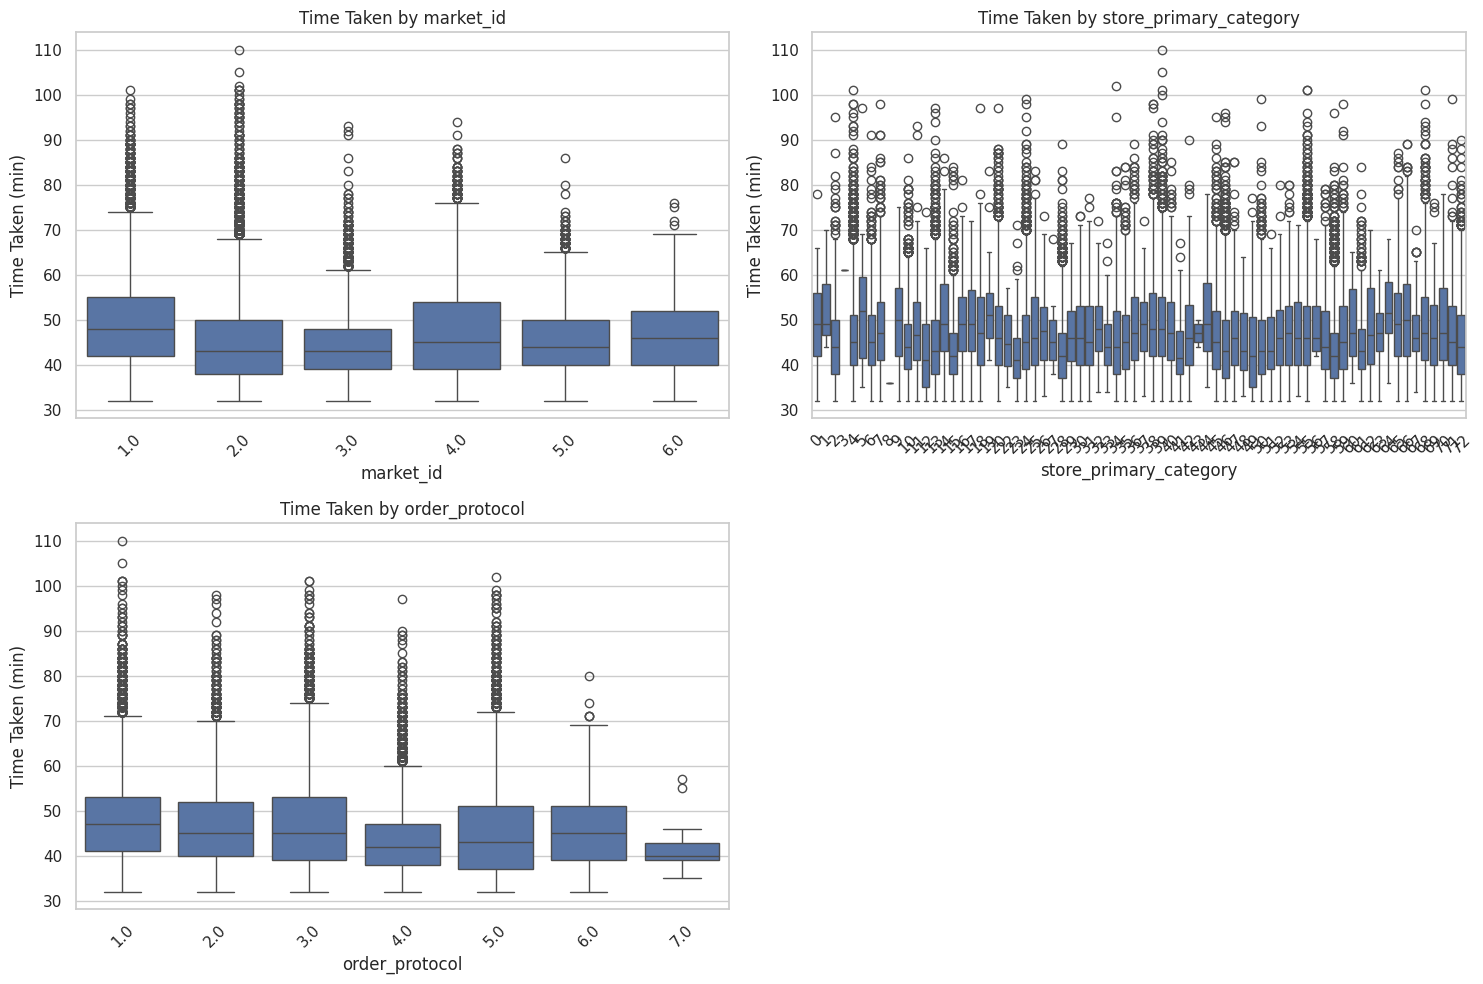

In [45]:
# Set plot style
sns.set(style="whitegrid")

# Combine X_train and y_train for visualization
train_df = X_train.copy()
train_df['time_taken_min'] = y_train

# Define a few important numerical and categorical features to plot
important_numerical = ['distance', 'total_items', 'subtotal']
important_categorical = ['market_id', 'store_primary_category', 'order_protocol']

# Scatter plots for numerical features vs. time_taken
plt.figure(figsize=(15, 10))
for i, col in enumerate(important_numerical):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=train_df, x=col, y='time_taken_min')
    plt.title(f'Time Taken vs {col}')
    plt.xlabel(col)
    plt.ylabel('Time Taken (min)')

plt.tight_layout()
plt.show()

# Box plots for categorical features vs. time_taken
plt.figure(figsize=(15, 10))
for i, col in enumerate(important_categorical):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=train_df, x=col, y='time_taken_min')
    plt.title(f'Time Taken by {col}')
    plt.xlabel(col)
    plt.ylabel('Time Taken (min)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



/tmp/ipython-input-46-4043157329.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='order_hour', y='time_taken_min', palette='coolwarm')


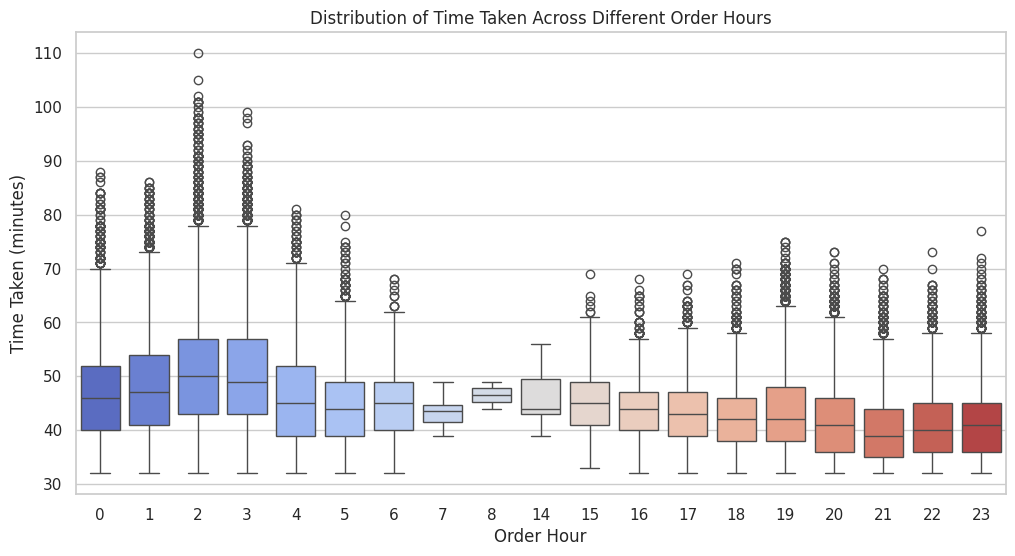

In [46]:
# Show the distribution of time_taken for different hours
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot distribution of time_taken across different order hours
sns.boxplot(data=train_df, x='order_hour', y='time_taken_min', palette='coolwarm')
plt.title('Distribution of Time Taken Across Different Order Hours')
plt.xlabel('Order Hour')
plt.ylabel('Time Taken (minutes)')
plt.xticks(rotation=0)
plt.show()




#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

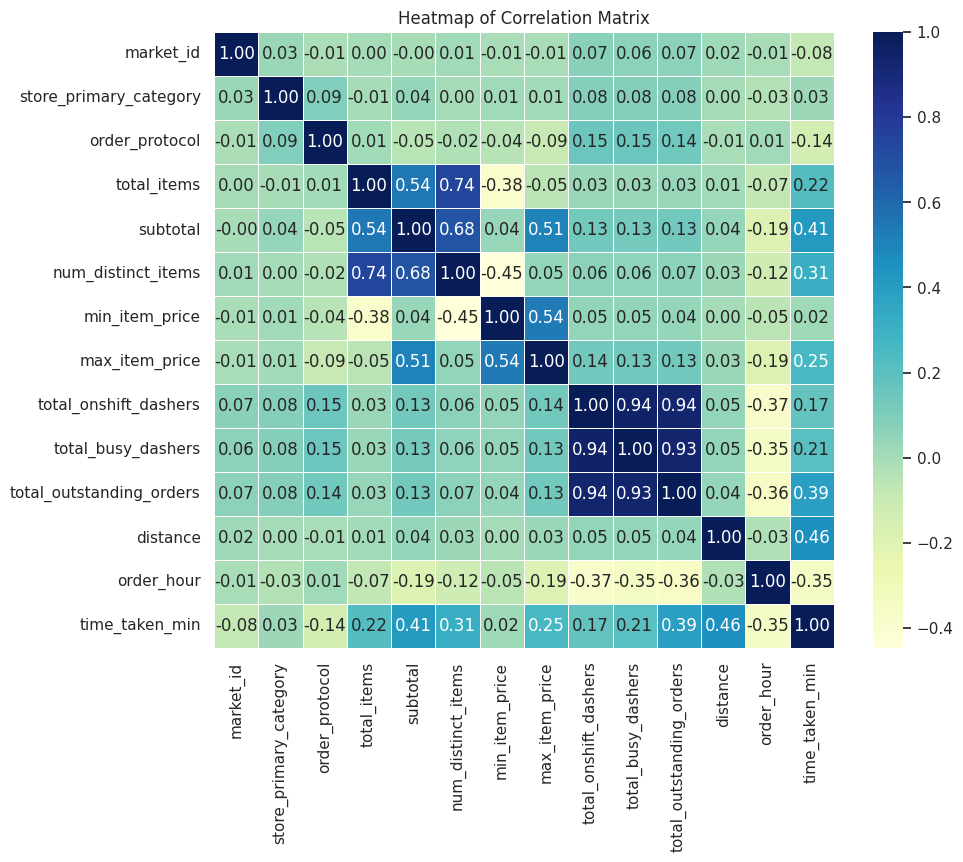

In [47]:
# Plot the heatmap of the correlation matrix

# Compute correlation matrix
corr = train_df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [48]:
# Drop 3-5 weakly correlated columns from training dataset

# Compute correlations with the target variable
correlations = train_df.corr(numeric_only=True)['time_taken_min'].abs().sort_values()

# Drop the 3-5 least correlated features (excluding the target itself)
weak_features = correlations.head(5).index.tolist()
if 'time_taken_min' in weak_features:
    weak_features.remove('time_taken_min')

# Drop from training data
train_df.drop(columns=weak_features, inplace=True)
X_train.drop(columns=weak_features, inplace=True)
X_test.drop(columns=weak_features, inplace=True)

print(f"Dropped weakly correlated features: {weak_features}")


Dropped weakly correlated features: ['min_item_price', 'store_primary_category', 'market_id', 'order_protocol', 'total_onshift_dashers']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

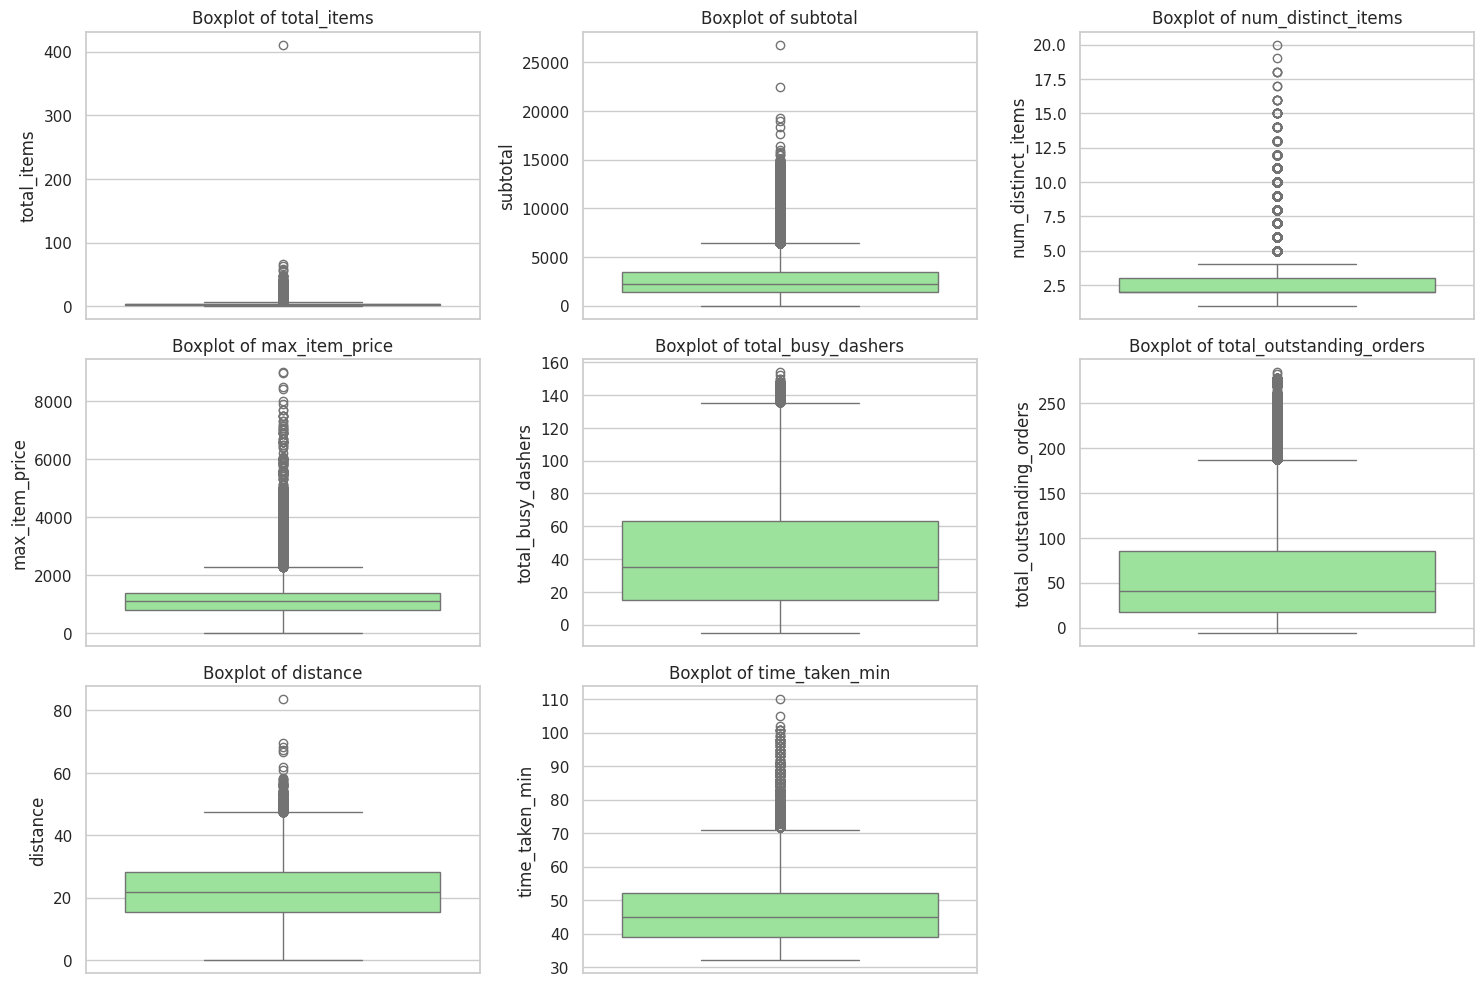

In [49]:
# Boxplot for time_taken

sns.set(style="whitegrid")

# Combine target with numerical features for visualization
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Add 'time_taken_min' if not already in the list
if 'time_taken_min' not in numerical_cols:
    numerical_cols.append('time_taken_min')

# Plot boxplots for each numerical feature including time_taken_min
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i + 1)
    sns.boxplot(y=train_df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [50]:
# Handle outliers



# List of numerical columns (excluding categorical)
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply outlier removal to train_df
train_df_cleaned = remove_outliers_iqr(train_df, numerical_cols)

print(f"Original rows: {train_df.shape[0]}")
print(f"Rows after outlier removal: {train_df_cleaned.shape[0]}")

Original rows: 140621
Rows after outlier removal: 118388


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [51]:
# Apply scaling to the numerical columns

from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling (excluding the target)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [52]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression

# Create/Initialise the Linear Regression model
lr_model = LinearRegression()


In [60]:
# Train the model using the training data
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Combine X_train and X_test to encode consistently
combined = pd.concat([X_train, X_test], axis=0)

# 2. Automatically find categorical columns
categorical_cols = combined.select_dtypes(include=['object', 'category']).columns.tolist()

# 3. Apply one-hot encoding
combined_encoded = pd.get_dummies(combined, columns=categorical_cols, drop_first=True)

# 4. Split back into encoded X_train and X_test
X_train_encoded = combined_encoded.iloc[:X_train.shape[0], :].copy()
X_test_encoded = combined_encoded.iloc[X_train.shape[0]:, :].copy()

# 5. Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_encoded, y_train)

# 6. Make predictions
y_pred = lr_model.predict(X_test_encoded)

# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model trained successfully!")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R² Score: {r2:.2f}")



Model trained successfully!
 Mean Squared Error (MSE): 23.95
 R² Score: 0.73


In [59]:
# Make predictions
# Make predictions on the test set
y_pred = lr_model.predict(X_test_encoded)

print(y_pred)


[47.36711486 63.88635093 39.26743021 ... 33.46476997 37.50096772
 42.52565522]


In [61]:
# Find results for evaluation metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" R² Score: {r2:.2f}")


 Mean Squared Error (MSE): 23.95
 Mean Absolute Error (MAE): 3.68
 R² Score: 0.73


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [62]:
# Loop through the number of features and test the model

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Store results
results = []

# Loop through different numbers of features
for n_features in range(5, X_train_encoded.shape[1] + 1, 5):  # step by 5 for speed
    # Initialize model and RFE
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n_features)

    # Fit RFE on training data
    rfe.fit(X_train_encoded, y_train)

    # Transform both training and test data
    X_train_rfe = rfe.transform(X_train_encoded)
    X_test_rfe = rfe.transform(X_test_encoded)

    # Train the model
    model.fit(X_train_rfe, y_train)

    # Predict
    y_pred = model.predict(X_test_rfe)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append((n_features, mse, r2))

# Print summary
print(" RFE Results:")
for n_features, mse, r2 in results:
    print(f"Features: {n_features:3} | MSE: {mse:.2f} | R²: {r2:.4f}")


 RFE Results:
Features:   5 | MSE: 28.46 | R²: 0.6748
Features:  10 | MSE: 26.81 | R²: 0.6937
Features:  15 | MSE: 23.95 | R²: 0.7264


In [63]:
# Build the final model with selected number of features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Set the optimal number of features from your analysis
optimal_features = 20  # 👈 change this number based on your best RFE result

# Initialize model and RFE
final_model = LinearRegression()
rfe_final = RFE(final_model, n_features_to_select=optimal_features)

# Fit RFE on training data
rfe_final.fit(X_train_encoded, y_train)

# Transform train and test data
X_train_selected = rfe_final.transform(X_train_encoded)
X_test_selected = rfe_final.transform(X_test_encoded)

# Train the final model
final_model.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred_final = final_model.predict(X_test_selected)

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred_final)
mae = mean_absolute_error(y_test, y_pred_final)
r2 = r2_score(y_test, y_pred_final)

print(f" Final Model Trained with Top {optimal_features} Features")
print(f" MSE: {mse:.2f}")
print(f" MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=20 > n_features=15. There will be no feature selection and all features will be kept.
  warnings.warn(


 Final Model Trained with Top 20 Features
 MSE: 23.95
 MAE: 3.68
R² Score: 0.7264


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

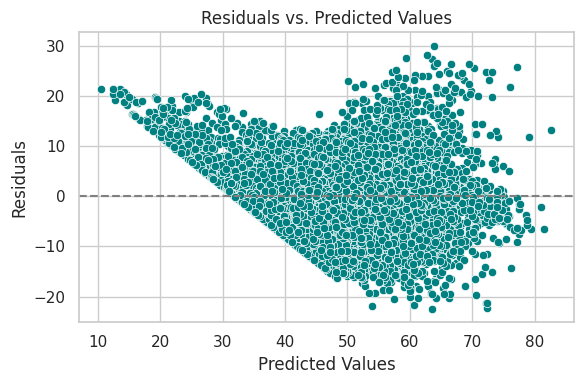

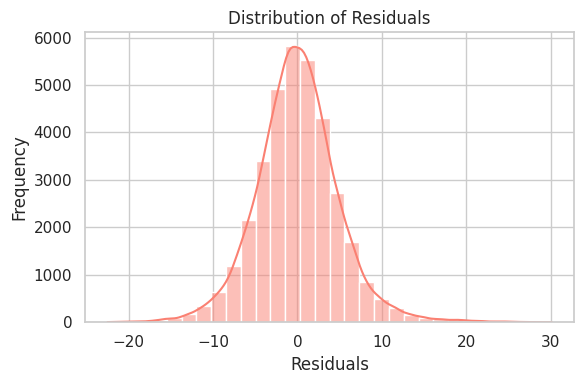

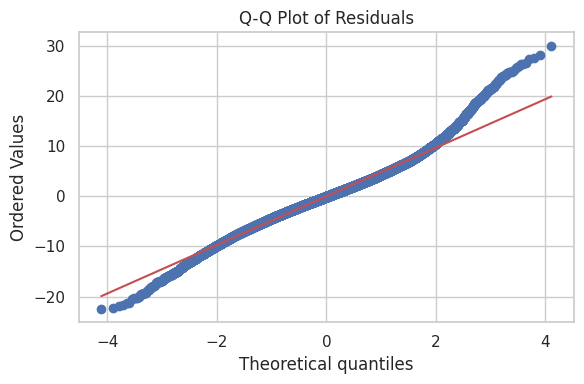

In [64]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred_final

# Set plot style
sns.set(style="whitegrid")

# Plot: Residuals vs. Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_final, y=residuals, color='teal')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# Plot: Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='salmon', bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot: Q-Q Plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [66]:
# Compare the scaled vs unscaled features used in the final model

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Step 1: Get feature names and RFE mask
all_features = X_train_encoded.columns
selected_mask = rfe_final.support_
selected_features = all_features[selected_mask]

# Step 2: Scaled coefficients
scaled_coeffs = pd.Series(final_model.coef_, index=selected_features)

# Step 3: Only reverse scale numerical columns (others stay the same)
X_train_unscaled_all = X_train_encoded.copy()
X_test_unscaled_all = X_test_encoded.copy()

# Apply inverse transform only on numerical columns
for i, col in enumerate(numerical_cols):
    if col in X_train_unscaled_all.columns:
        X_train_unscaled_all[col] = X_train_unscaled_all[col] * scaler.scale_[i] + scaler.mean_[i]
        X_test_unscaled_all[col] = X_test_unscaled_all[col] * scaler.scale_[i] + scaler.mean_[i]

# Step 4: Apply RFE again on unscaled data
rfe_unscaled = RFE(LinearRegression(), n_features_to_select=len(selected_features))
rfe_unscaled.fit(X_train_unscaled_all, y_train)

# Step 5: Select corresponding features and fit model
selected_features_unscaled = X_train_unscaled_all.columns[rfe_unscaled.support_]
X_train_unscaled_selected = X_train_unscaled_all[selected_features_unscaled]

model_unscaled = LinearRegression()
model_unscaled.fit(X_train_unscaled_selected, y_train)

# Step 6: Get unscaled coefficients
unscaled_coeffs = pd.Series(model_unscaled.coef_, index=selected_features_unscaled)

# Step 7: Compare coefficients
coeff_comparison = pd.DataFrame({
    'Feature (Scaled RFE)': selected_features.values,
    'Coefficient (Scaled)': scaled_coeffs.values,
    'Feature (Unscaled RFE)': selected_features_unscaled.values,
    'Coefficient (Unscaled)': unscaled_coeffs.values
})

print("Comparison of Scaled vs Unscaled Coefficients:\n")
print(coeff_comparison)



Comparison of Scaled vs Unscaled Coefficients:

        Feature (Scaled RFE)  Coefficient (Scaled)    Feature (Unscaled RFE)  \
0                total_items             -0.100191               total_items   
1                   subtotal              2.287908                  subtotal   
2         num_distinct_items              0.860764        num_distinct_items   
3             max_item_price              0.448098            max_item_price   
4         total_busy_dashers            -11.604805        total_busy_dashers   
5   total_outstanding_orders             13.060582  total_outstanding_orders   
6                   distance              4.114812                  distance   
7                 order_hour             -0.208987                order_hour   
8           order_day_Monday              3.893567          order_day_Monday   
9         order_day_Saturday              0.341608        order_day_Saturday   
10          order_day_Sunday              1.494740          order_day_Su

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [67]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Extract the unscaled coefficient for 'total_items'
if 'total_items' in unscaled_coeffs.index:
    effect = unscaled_coeffs['total_items']
    print(f" A 1-unit increase in 'total_items' changes delivery time by {effect:.2f} minutes (on average).")
else:
    print(" 'total_items' was not selected by RFE in the final unscaled model.")


 A 1-unit increase in 'total_items' changes delivery time by -0.04 minutes (on average).


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer: YES , this influnce delivery tine by capturing  variations in locations,food type ,order method and day -demands patterns**
>



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:means that 20% of the entire dataset will be used for testing the model, while the remaining 80% will be used for training.**
>



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:The feature distance has the highest correlation with the target variable time_taken_min, indicating that longer distances generally lead to longer delivery times.**
>



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:I used the Interquartile Range (IQR) method, which identifies data points lying beyond 1.5 times the IQR from the first and third quartiles, and I addressed them by removing those outlier rows from the dataset to improve model reliability.**

>



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:distance, total_items, and subtotal, as they have the highest influence on increasing or decreasing the delivery duration in the final model.**
>



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:Linear Regression is a simple algorithm used to predict a number  based on input features .
It finds the best straight line that fits the data using mathematical formulas.
Each input feature has a coefficient showing how much it affects the prediction.
The model aims to minimize the error between actual and predicted values using Mean Squared Erro.
It works best when the relationship is linear, and features are not too similar.
It’s fast, easy to use, and useful for many real-world prediction problems.**
>




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:simple linear regression- Uses only one input (independent) variable to predict the output (dependent) variable.
multiple linear regression- Uses two or more input variables to predict the output.**
>



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:The cost function measures how well the linear regression model fits the data.
In simple terms, it tells us how far off our predictions are from the actual values.**
>




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



** Answer:
Overfitting happens when a model learns too much. It performs well on training data but poorly on new (test) data because it doesn’t generalize.

Underfitting happens when a model is too simple and fails to learn the underlying patterns in the data. It performs poorly on both training and test data **

>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:Residual plots show the difference between the actual values and the predicted values of a model called residuals. They help in checking whether the assumptions of linear regression are met.**
>